In [13]:
from medpy.io import load
image_data, image_header = load('training/HGG/brats_tcia_pat447_0313/VSD.Brain.XX.O.MR_T1.41130.mha')

In [16]:
image_data.shape

(240, 240, 155)

In [17]:
image_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
image_header.get_voxel_spacing()

(1.0, 1.0, 1.0)

In [19]:
image_header.get_offset()

(0.0, -239.0, 0.0)

In [20]:
from medpy.filter import otsu
threshold = otsu(image_data)
output_data = image_data > threshold

In [23]:
threshold

123.75

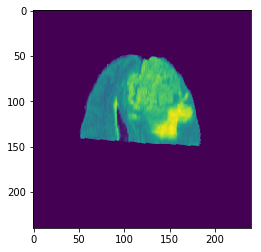

In [68]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
inputImageFileName = 'training/HGG/brats_2013_pat0006_1/VSD.Brain.XX.O.MR_Flair.54542.mha'

reader = sitk.ImageFileReader()
reader.SetImageIO("MetaImageIO")
reader.SetFileName(inputImageFileName)
image = reader.Execute();
nda = sitk.GetArrayFromImage(image)
plt.imshow(nda[100])

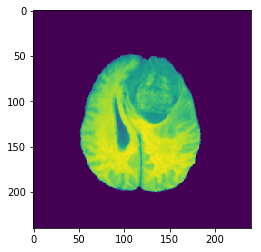

In [57]:
inputImageFileName = 'training/HGG/brats_2013_pat0006_1/VSD.Brain.XX.O.MR_T1.54543.mha'

reader = sitk.ImageFileReader()
reader.SetImageIO("MetaImageIO")
reader.SetFileName(inputImageFileName)
image = reader.Execute();
nda = sitk.GetArrayFromImage(image)
plt.imshow(nda[100])

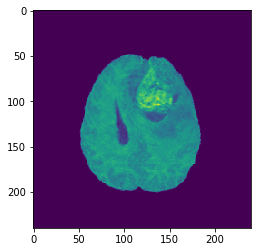

In [58]:
inputImageFileName = 'training/HGG/brats_2013_pat0006_1/VSD.Brain.XX.O.MR_T1c.54544.mha'

reader = sitk.ImageFileReader()
reader.SetImageIO("MetaImageIO")
reader.SetFileName(inputImageFileName)
image = reader.Execute();
nda = sitk.GetArrayFromImage(image)
plt.imshow(nda[100])

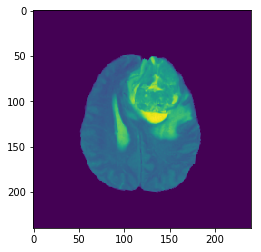

In [59]:
inputImageFileName = 'training/HGG/brats_2013_pat0006_1/VSD.Brain.XX.O.MR_T2.54545.mha'

reader = sitk.ImageFileReader()
reader.SetImageIO("MetaImageIO")
reader.SetFileName(inputImageFileName)
image = reader.Execute();
nda = sitk.GetArrayFromImage(image)
plt.imshow(nda[100])

In [55]:
nda[1].shapeinputImageFileName = 'training/HGG/brats_2013_pat0006_1/VSD.Brain_3more.XX.O.OT.54547.mha'

reader = sitk.ImageFileReader()
reader.SetImageIO("MetaImageIO")
reader.SetFileName(inputImageFileName)
image = reader.Execute();
nda = sitk.GetArrayFromImage(image)
plt.imshow(nda[140])

AttributeError: 'numpy.ndarray' object has no attribute 'shapeinputImageFileName'

In [41]:
def myshow(img, title=None, margin=0.05, dpi=80 ):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    
    
    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]
        
        # the the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            nda = nda[nda.shape[0]//2,:,:]
    
    elif nda.ndim == 4:
        c = nda.shape[-1]
        
        if not c in (3,4):
            raise Runtime("Unable to show 3D-vector Image")
            
        # take a z-slice
        nda = nda[nda.shape[0]//2,:,:,:]
            
    ysize = nda.shape[0]
    xsize = nda.shape[1]
   
    
    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ysize / dpi, (1 + margin) * xsize / dpi

    fig = figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    extent = (0, xsize*spacing[1], ysize*spacing[0], 0)
    
    t = ax.imshow(nda,extent=extent,interpolation=None)
    
    if nda.ndim == 2:
        t.set_cmap("gray")
    
    if(title):
        plt.title(title)

In [42]:
myshow(sitk.Expand(image,[2,2]), title="Big Visibile Human Head")

RuntimeError: Exception thrown in SimpleITK Expand: c:\d\vs14-win32-pkg\simpleitk\code\common\include\sitkTemplateFunctions.h:96:
sitk::ERROR: Unable to convert vector to ITK type
Expected vector of length 3 but only got 2 elements.